In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os

# Importation des données et Visualisation

In [8]:
x_train = h5py.File('F:\ML_Project\dreem-2-sleep-classification-challenge-2020\X_train.h5\X_train.h5', 'r')
list(x_train.keys())

['eeg_1',
 'eeg_2',
 'eeg_3',
 'eeg_4',
 'eeg_5',
 'eeg_6',
 'eeg_7',
 'index',
 'index_absolute',
 'index_window',
 'pulse',
 'x',
 'y',
 'z']

Le jeu de données physiologiques contient:
7 channels d'EEG, 
1 channel du pulse de l'oxymètre, 
les 3 channels de l'accélèromètre (x,y,z).

(24688, 300)
float32


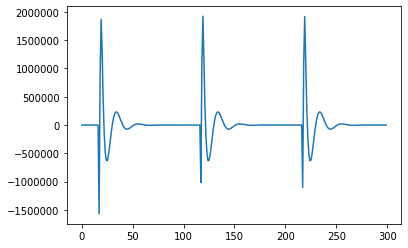

In [38]:
pulse = x_train['pulse']
print(pulse.shape)
print(pulse.dtype)
plt.plot(pulse[1])

On a pour l'oxymètre, 24688 fenêtres de 30 secondes d'enregistrement. Chaque fenêtre contient 300 points de temps donc on a une valeur d'oymétrie toutes les 100ms.

(24688, 1500)
float32


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


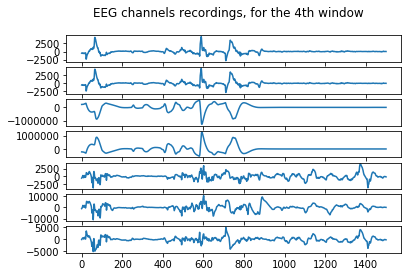

In [50]:
eeg_1 = x_train['eeg_1']
eeg_2 = x_train['eeg_2']
eeg_3 = x_train['eeg_3']
eeg_4 = x_train['eeg_4']
eeg_5 = x_train['eeg_5']
eeg_6 = x_train['eeg_6']
eeg_7 = x_train['eeg_7']
print(eeg_1.shape)
print(eeg_1.dtype)
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7)
fig.suptitle('EEG channels recordings, for the 4th window')
ax1.plot(eeg_1[4])
ax2.plot(eeg_1[4])
ax3.plot(eeg_3[4])
ax4.plot(eeg_4[4])
ax5.plot(eeg_5[4])
ax6.plot(eeg_6[4])
ax7.plot(eeg_7[4])
fig.show()

Pour chaque channel d'EEG, on a aussi 24688 fenêtres de 30 secondes d'enregistrement. Chaque fenêtre contient 1500 points de temps donc une valeur d'EEG toutes les 20ms. 

(24688, 300)
float32


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


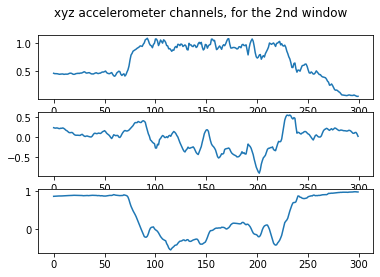

In [91]:
acc_x = x_train['x']
acc_y = x_train['y']
acc_z = x_train['z']
print(acc_x.shape)
print(acc_x.dtype)
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('xyz accelerometer channels, for the 2nd window')
ax1.plot(acc_x[2])
ax2.plot(acc_y[2])
ax3.plot(acc_z[2])
fig.show()

Pour les 3 dimensions de l'accéléromètre(x,y,z), on a toujours 24688 fenêtres de 30 secondes d'enregistrement. Chaque fenêtre contient 300 points de temps donc la valeur de l'acélération dans une dimension de l'espace toutes les 100ms. 

index shape = (24688,)
index type = int64
index absolute shape = (24688,)
index absolute type = int64
index window shape = (24688,)
index window type = int64


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


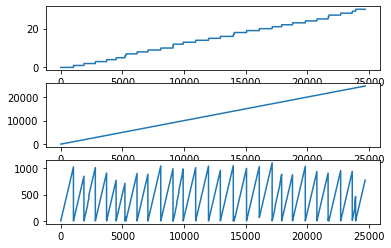

In [76]:
index = x_train['index']
index_abs = x_train['index_absolute']
index_win = x_train['index_window']
print('index shape = '+str(index.shape))
print('index type = '+str(index.dtype))
print('index absolute shape = '+str(index_abs.shape))
print('index absolute type = '+str(index_abs.dtype))
print('index window shape = '+str(index_win.shape))
print('index window type = '+str(index_win.dtype))
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(index)
ax2.plot(index_abs)
ax3.plot(index_win)
fig.show()

Index_absolute contient le numéro de la fenêtre de 30s parmi tout le jeu de données. Les numéro vont de 0 à 24687 car il y a 24688 enregistrements de 30s.

Index contient, pour chacune des fenêtres d'enregistrement, le numéro du participant correspondant qui a été enregistré (de 0 à 30)

Index_window contient le numéro de la fenêtre pour un participant. A lire avec Index. Pour chaque valeur différente de Index (participant différent) Index_window contient une suite de 0 à n-1 avec n le nombre de fenêtre de 30s enregistrées sur ce participants.

In [96]:
y_train = pd.read_csv('F:\ML_Project\dreem-2-sleep-classification-challenge-2020\y_train.csv')
y_train

,index,sleep_stage
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


y_train rapporte la phase du sommeil (awake, N1, N2, N3, REM) pendant laquelle est enregitrée chaque fenêtre. Attention, il faut prendre en compte le fait que certaines phases sont plus courantes que d'autres ce qui peut introduire un biais dans certains modèles d'apprentissage.

In [3]:
x_test = h5py.File('F:\ML_Project\dreem-2-sleep-classification-challenge-2020\X_test.h5\X_test.h5', 'r')
x_test

<HDF5 file "X_test.h5" (mode r)>